# Algorithm Testing

In this notebook, we will test an optimization algorithm on various benchmark functions to evaluate its performance.

In [ ]:
from algorithm_testing.optimizer import asignar_horas_estudio_optimizado, plot_and_save_results
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Segoe UI Emoji'  # Windows
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

## Testing Solvers

In [ ]:
import cvxpy as cp
print("Solvers instalados:", cp.installed_solvers())

Solvers instalados: ['CLARABEL', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']


### Parameters fixed

In [ ]:
import pandas as pd

# --- CARGA Y PROCESAMIENTO DE DATOS REALES ---
try:
    # Cargar el fichero CSV proporcionado
    df_temario = pd.read_csv('topic_blocks_rows.csv')

    # 1. Extraer la Importancia (omega) real de cada tema
    # Crea un diccionario {topic_number: importance}
    omega_real = pd.Series(df_temario.importance.values, index=df_temario.topic_number).to_dict()

    # 2. Extraer la Estructura de Bloques real
    # Crea un diccionario {topic_number: block_number}
    topic_blocks_real = pd.Series(df_temario.block_number.values, index=df_temario.topic_number).to_dict()

    # 3. Contar el número total de temas reales
    TOTAL_TEMAS_real = len(df_temario['topic_number'].unique())

    print(f"✅ Fichero cargado con éxito. Total de temas: {TOTAL_TEMAS_real}")
    # print("\nImportancia de los primeros 5 temas:", {k: omega_real[k] for k in list(omega_real)[:5]})
    # print("Bloque de los primeros 5 temas:", {k: topic_blocks_real[k] for k in list(topic_blocks_real)[:5]})

except FileNotFoundError:
    print("❌ Error: Asegúrate de que el fichero 'topic_blocks_rows.csv' está en la misma carpeta.")

# --- 2. CONFIGURACIÓN DE VUELTAS DE ESTUDIO (se mantiene) ---
lap_settings = {
    1: {"prop_b1": 0.40, "prop_b2": 0.35, "prop_b3": 0.25, "mu": 2.0},
    2: {"prop_b1": 0.35, "prop_b2": 0.40, "prop_b3": 0.25, "mu": 0.8}
}

# --- 3. CONFIGURACIÓN DE PENALIZACIONES (se mantiene) ---
penalty_settings = {
    3: {"lambda_penalty1": 0.1, "lambda_penalty2": 0.1, "lambda_penalty3": 0.15},
    4: {"lambda_penalty1": 0.3, "lambda_penalty2": 0.3, "lambda_penalty3": 0.35}
}

# --- 4. PARÁMETROS FIJOS DEL ALGORITMO (se mantiene) ---
h_max_factor = 0.10
alpha_factor = 0.01

✅ Fichero cargado con éxito. Total de temas: 45


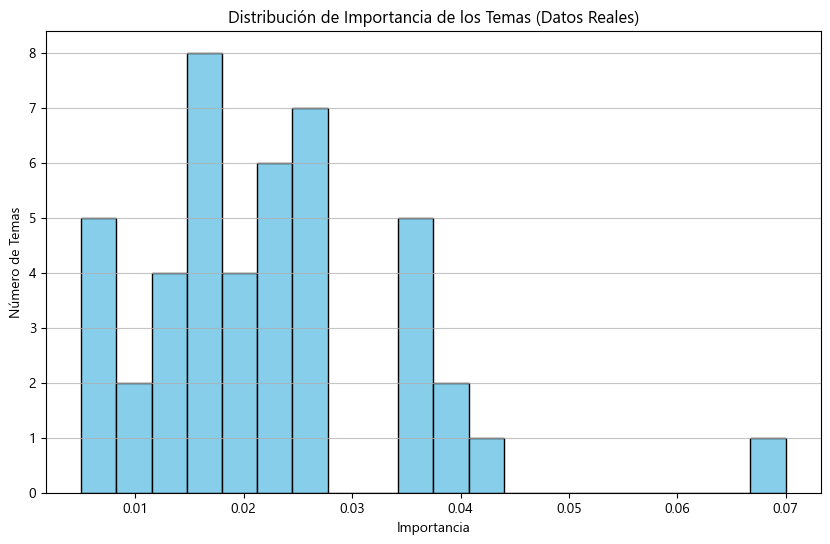

In [ ]:
# Plot the importance distribution

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(omega_real.values(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Importancia de los Temas (Datos Reales)')
plt.xlabel('Importancia')
plt.ylabel('Número de Temas')
plt.grid(axis='y', alpha=0.75)
plt.show()



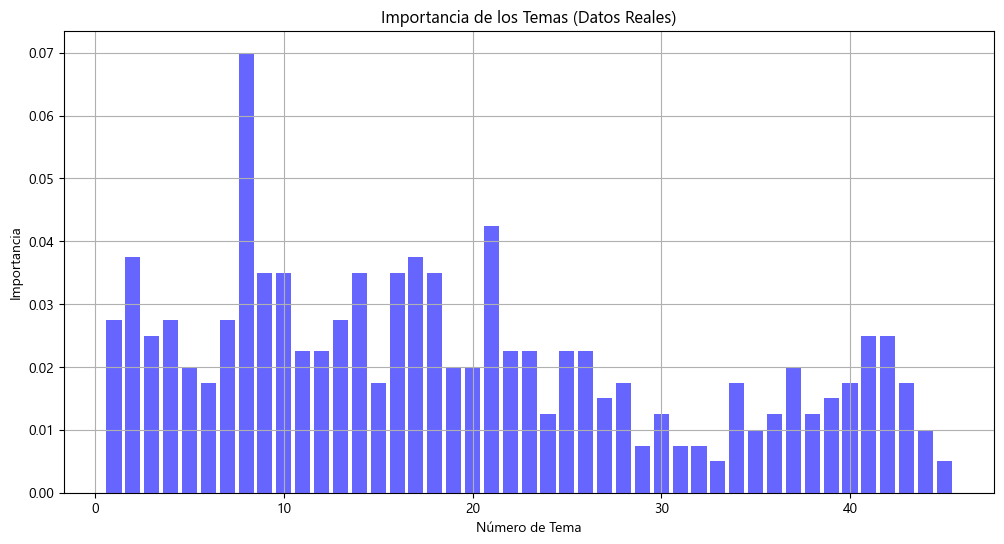

In [ ]:
# Temas vs importancia
plt.figure(figsize=(12, 6))
plt.bar(list(omega_real.keys()), list(omega_real.values()), color='blue', alpha = 0.6, )
plt.title('Importancia de los Temas (Datos Reales)')
plt.xlabel('Número de Tema')
plt.ylabel('Importancia')
plt.grid(True)
plt.show()


### Caso 1 (Real): El Estudiante Equilibrado ⚖️
**Contexto:** El estudiante tiene 3 meses y 200 horas. El objetivo es un plan bien distribuido, pero ahora la priorización se basará en la importancia real de cada uno de tus temas.


=== COMPARACIÓN DE PERFILES POR ÁREA TEMÁTICA ===

🎯 Mismo perfil base, diferentes rendimientos según área de conocimiento
📋 CLASIFICACIÓN DE TEMAS:
   ⚖️ Derecho (1-27): 27 temas
   🏛️ Sociología (27-38): 12 temas
   🔬 Científico-Técnico (38-45): 8 temas
   📝 Total: 47 temas

⚖️ PERFIL 1: ESPECIALISTA EN DERECHO
   Excelente en Derecho, malo en Sociología y Científico-Técnico


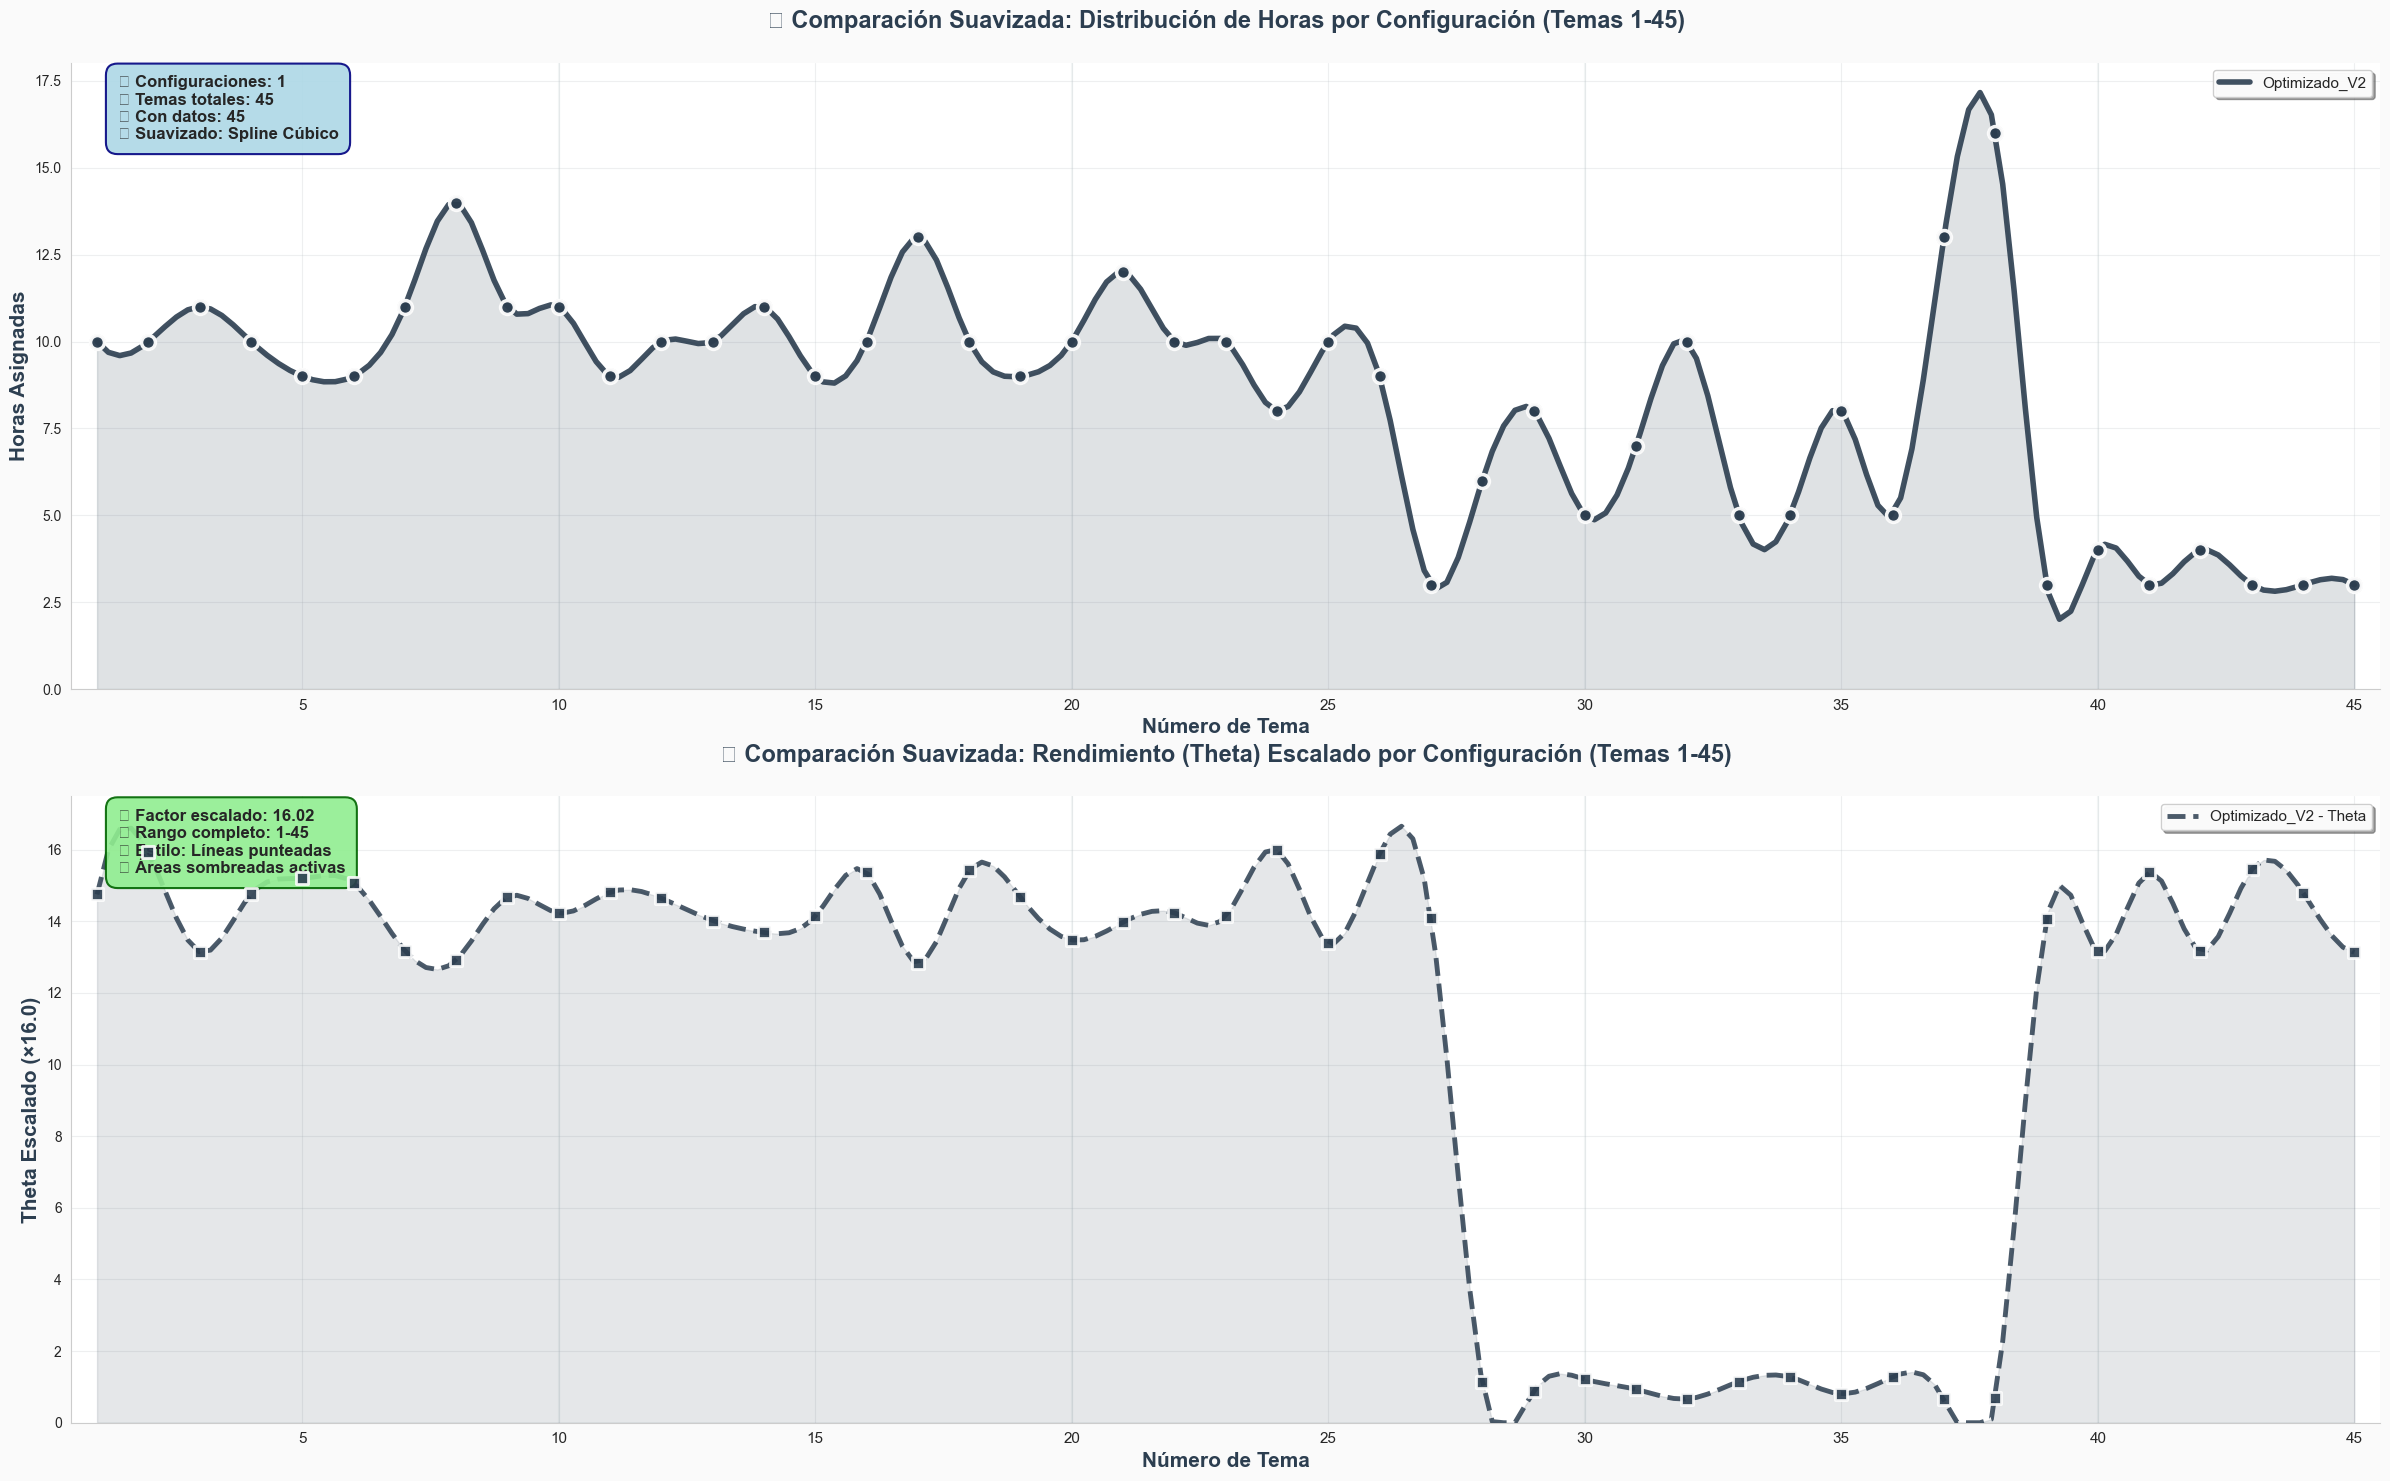

✅ Total horas: 380h
   Temas cubiertos: 45/45
   📊 Rendimiento por área:
      • Derecho (1-27): θ=0.898 (ALTO)
      • Sociología (27-38): θ=0.129 (BAJO)
      • Científico-Técnico (38-45): θ=0.779 (BAJO)

⚖️ PERFIL 2: ESTUDIANTE EQUILIBRADO
   Rendimiento similar en todas las áreas


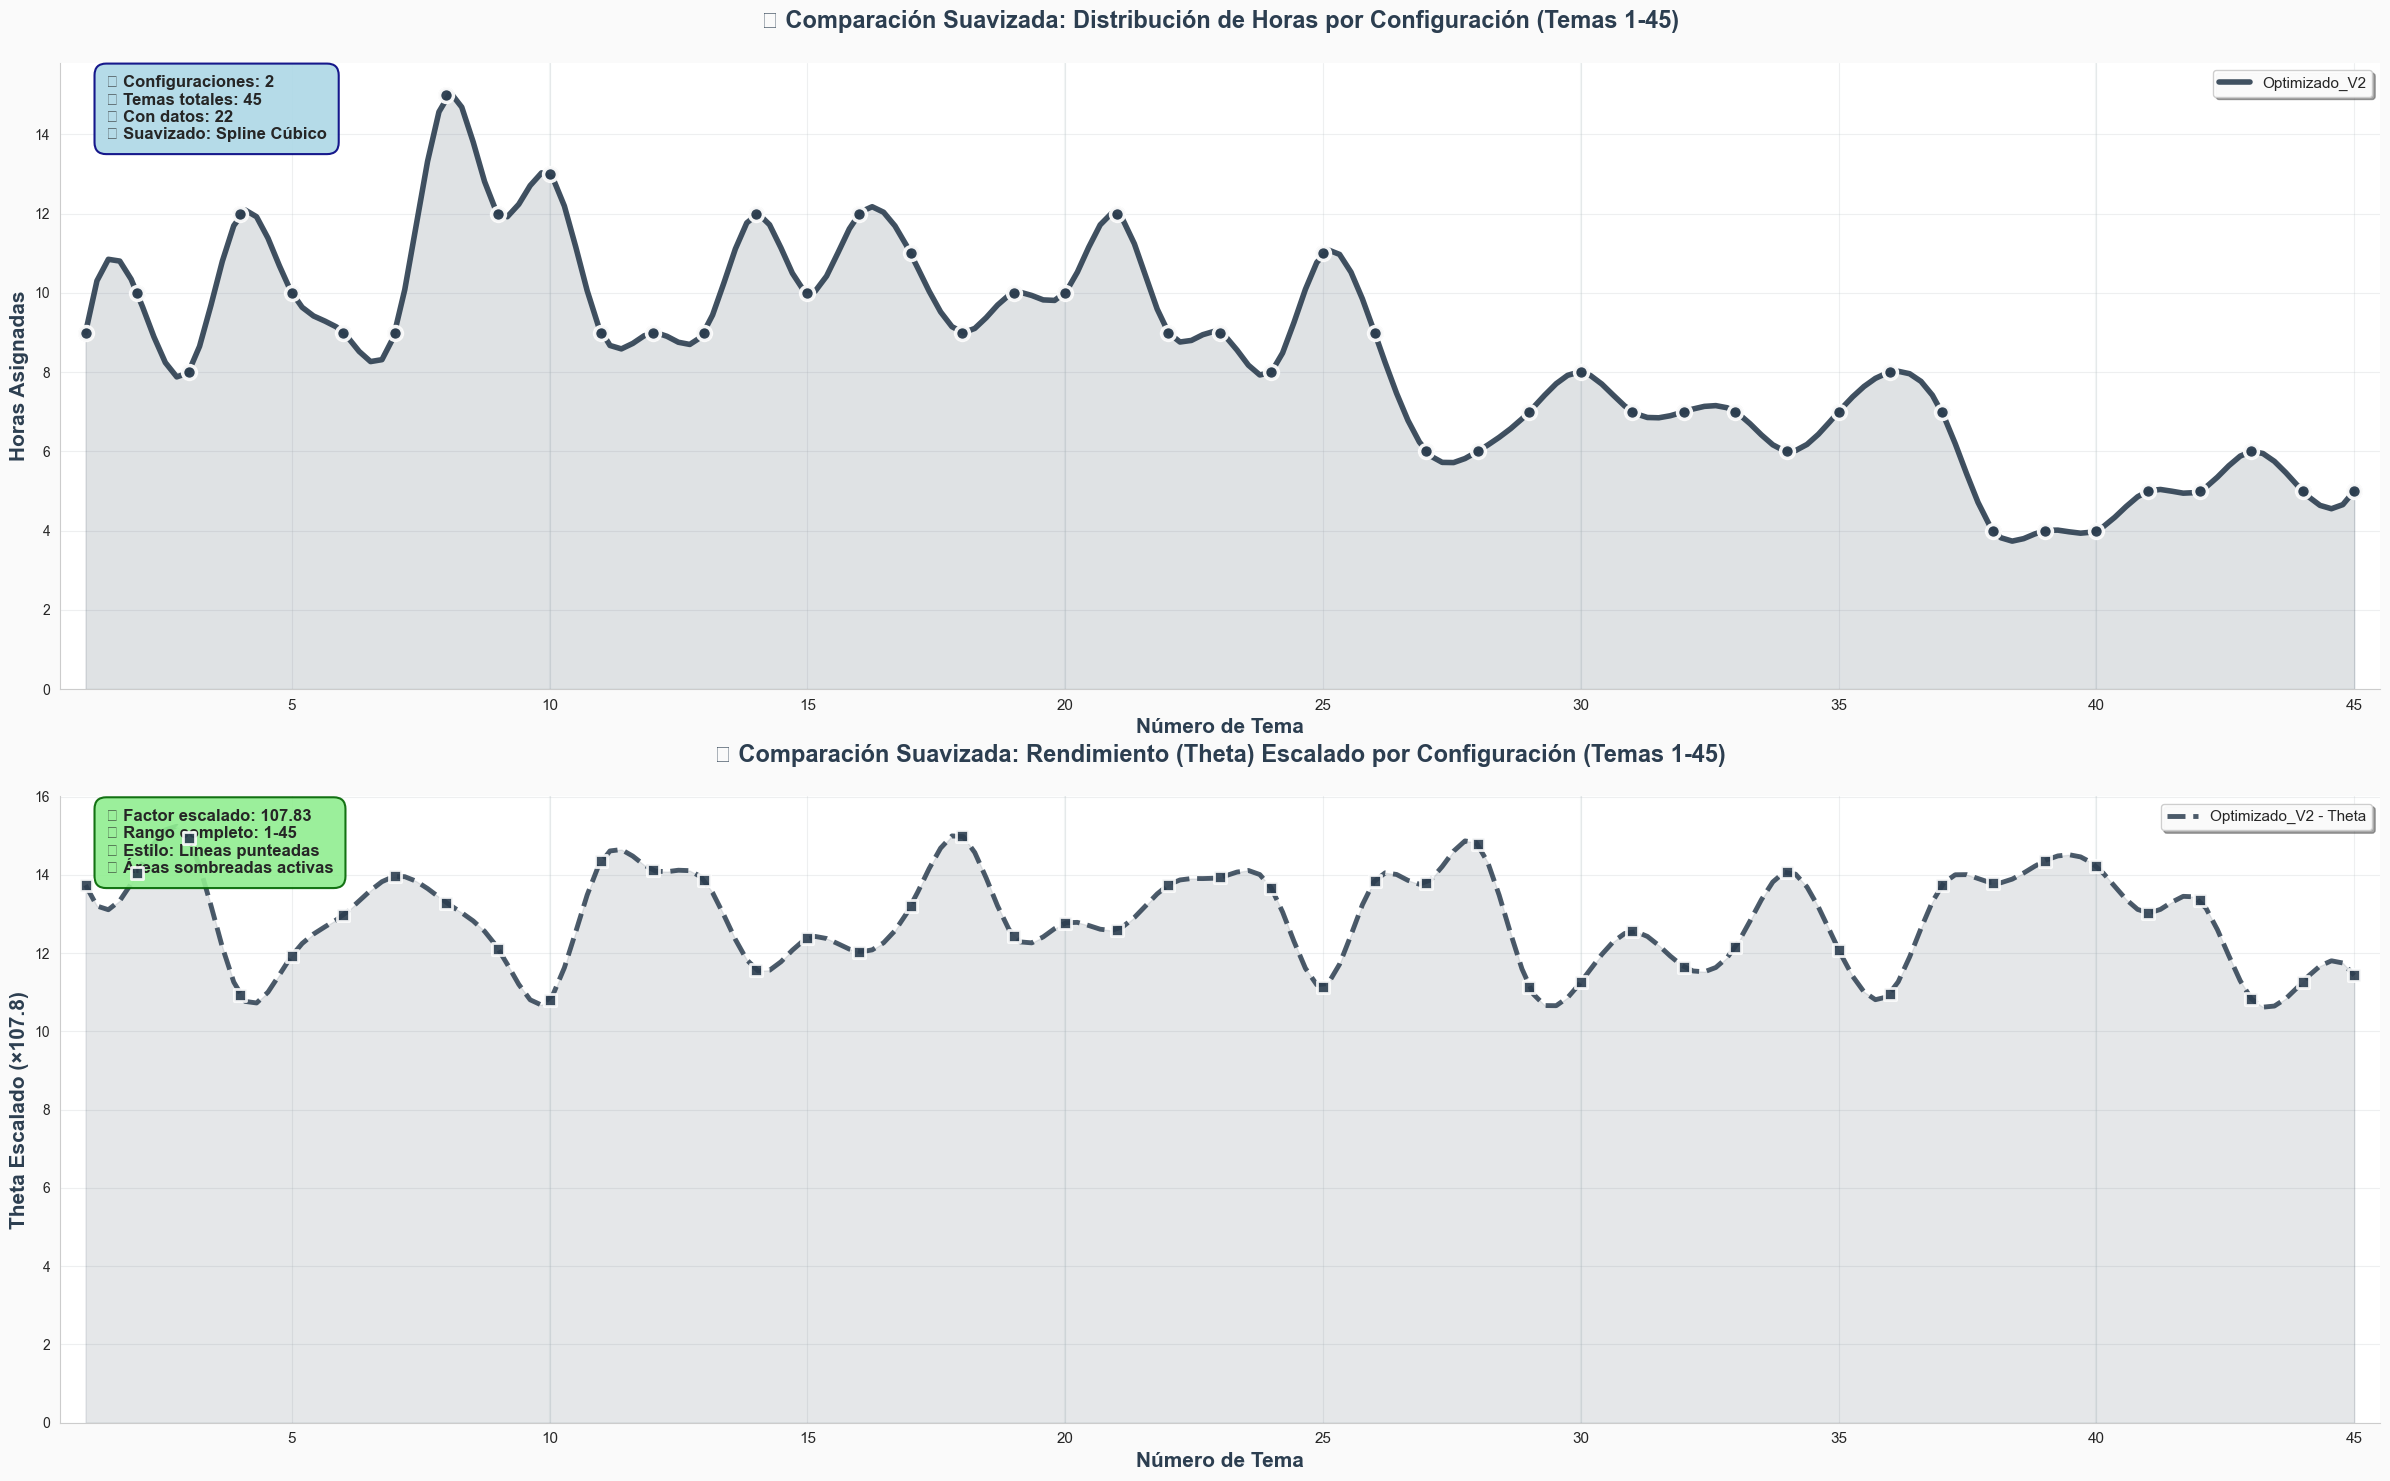

✅ Total horas: 380h
   Temas cubiertos: 45/45
   📊 Rendimiento por área:
      • Derecho (1-27): θ=0.121 (MEDIO)
      • Sociología (27-38): θ=0.117 (MEDIO)
      • Científico-Técnico (38-45): θ=0.119 (MEDIO)

🔬 PERFIL 3: ESPECIALISTA CIENTÍFICO-TÉCNICO
   Excelente en Científico-Técnico, malo en Derecho y Sociología


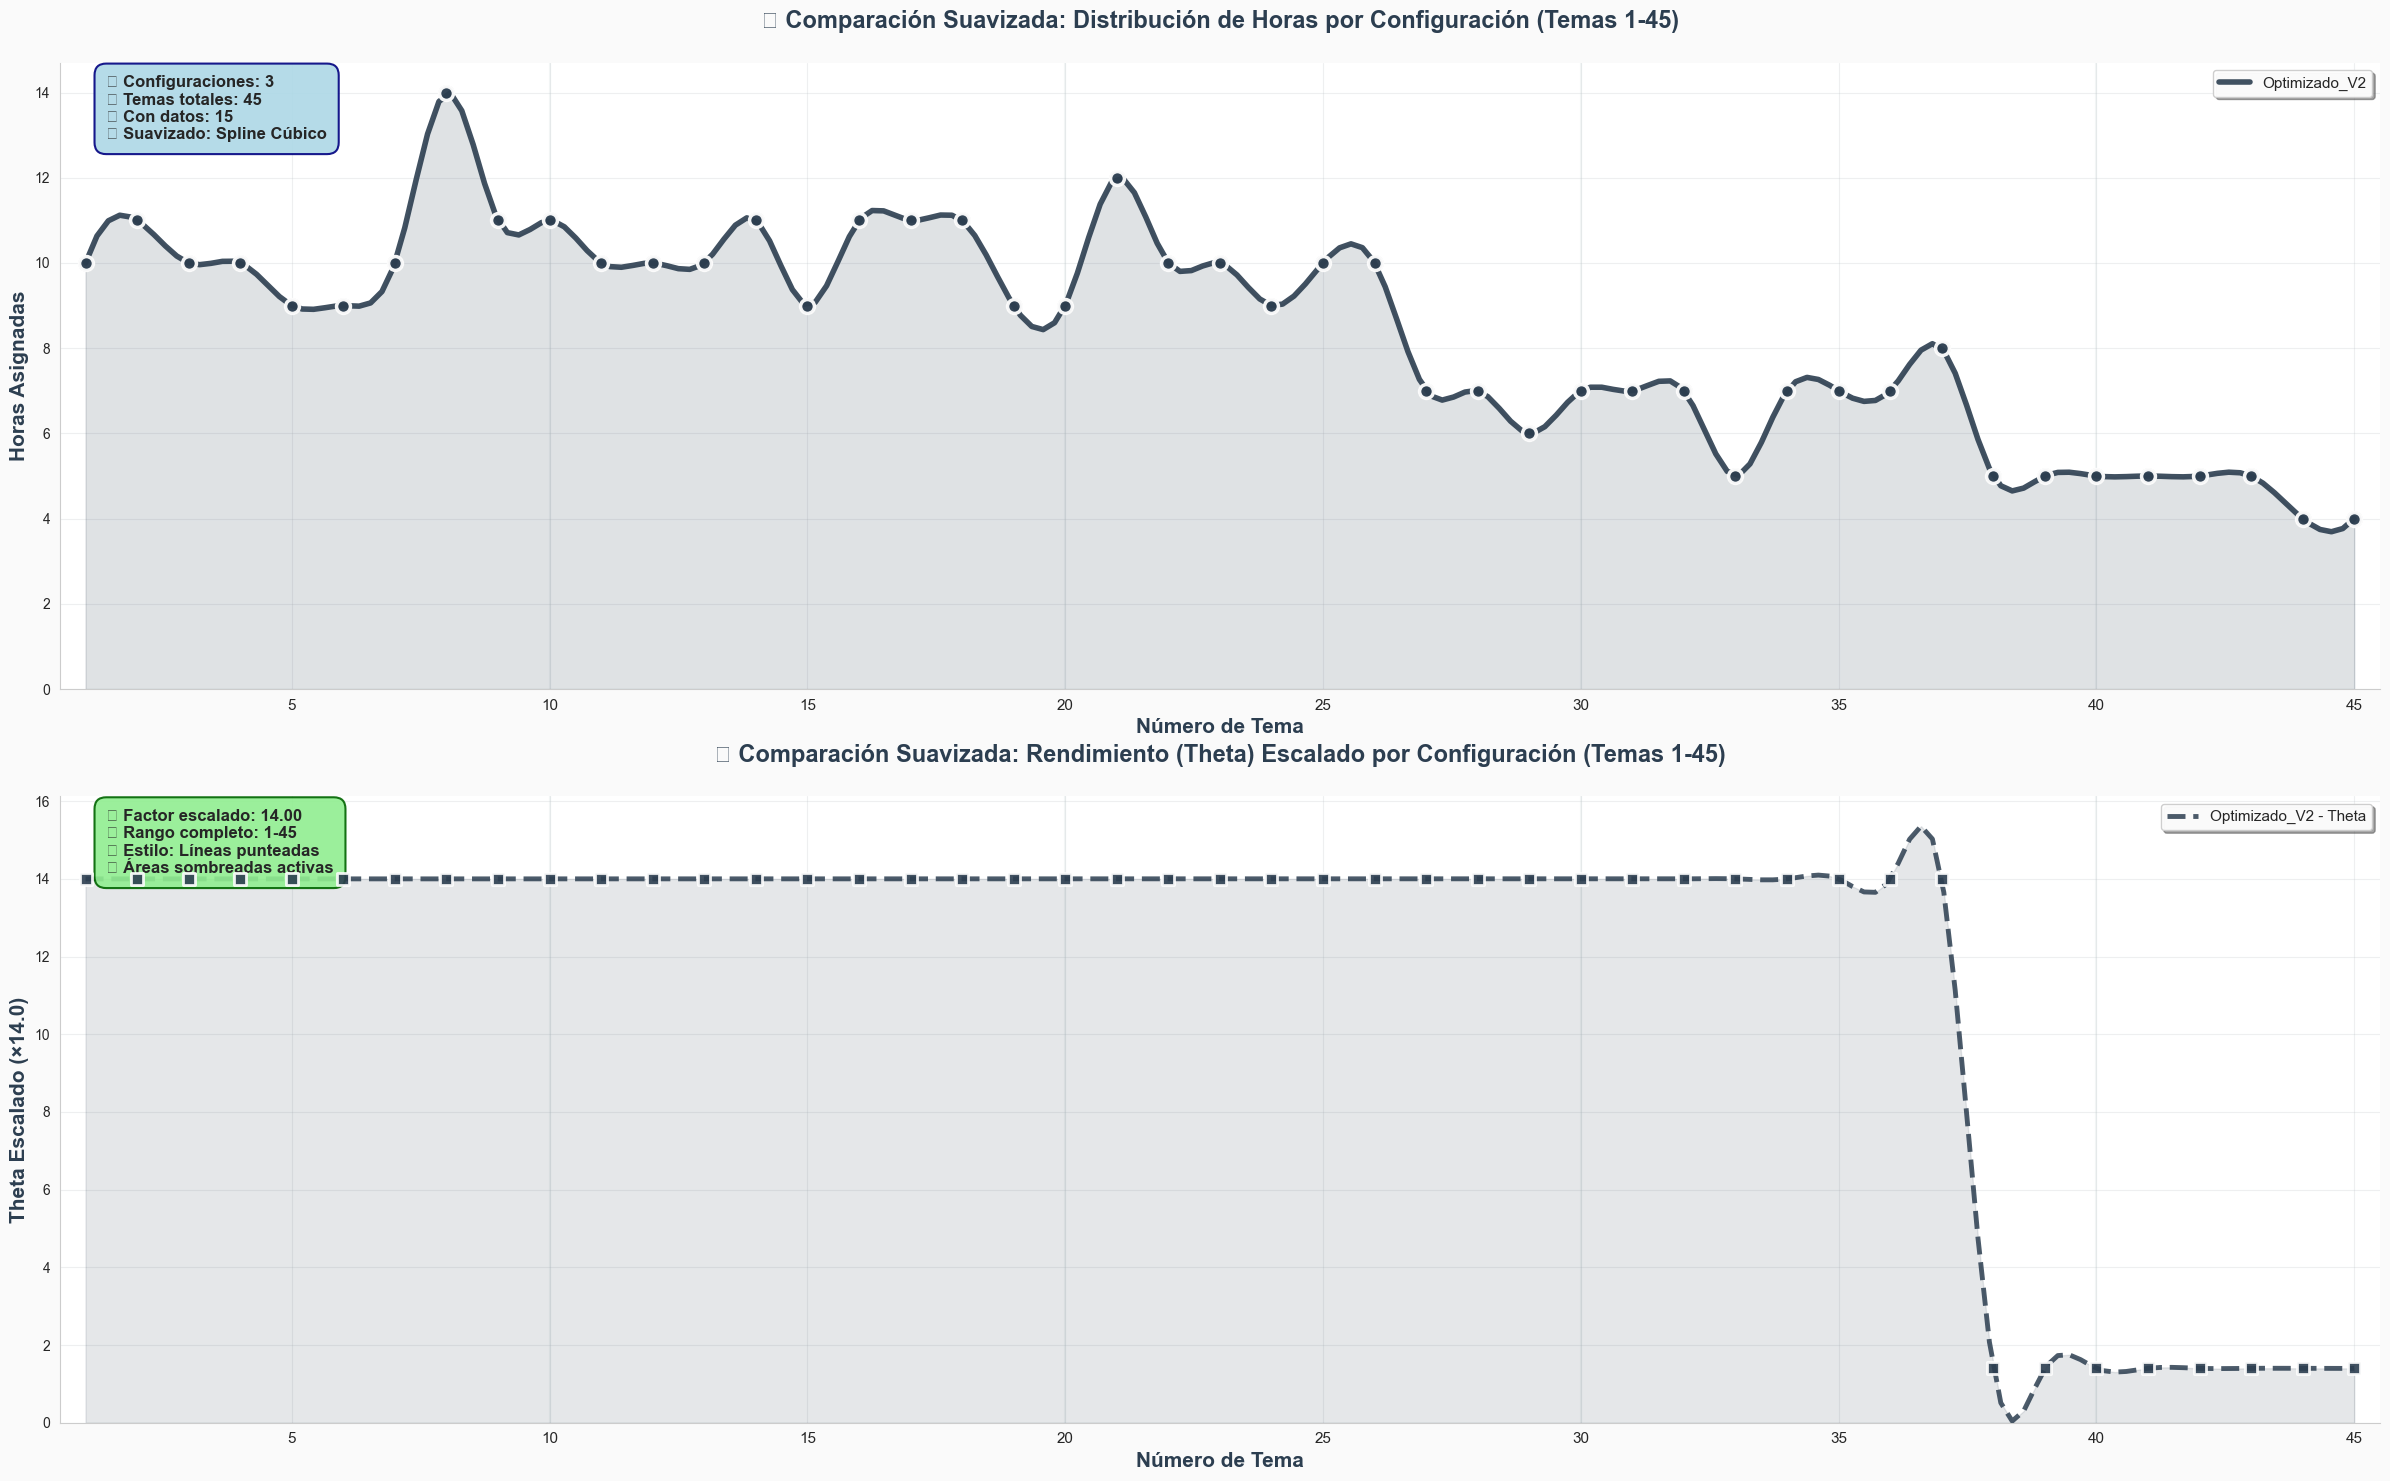

✅ Total horas: 380h
   Temas cubiertos: 45/45
   📊 Rendimiento por área:
      • Derecho (1-27): θ=1.000 (BAJO)
      • Sociología (27-38): θ=0.925 (BAJO)
      • Científico-Técnico (38-45): θ=0.100 (ALTO)

📊 Generando gráfico comparativo...


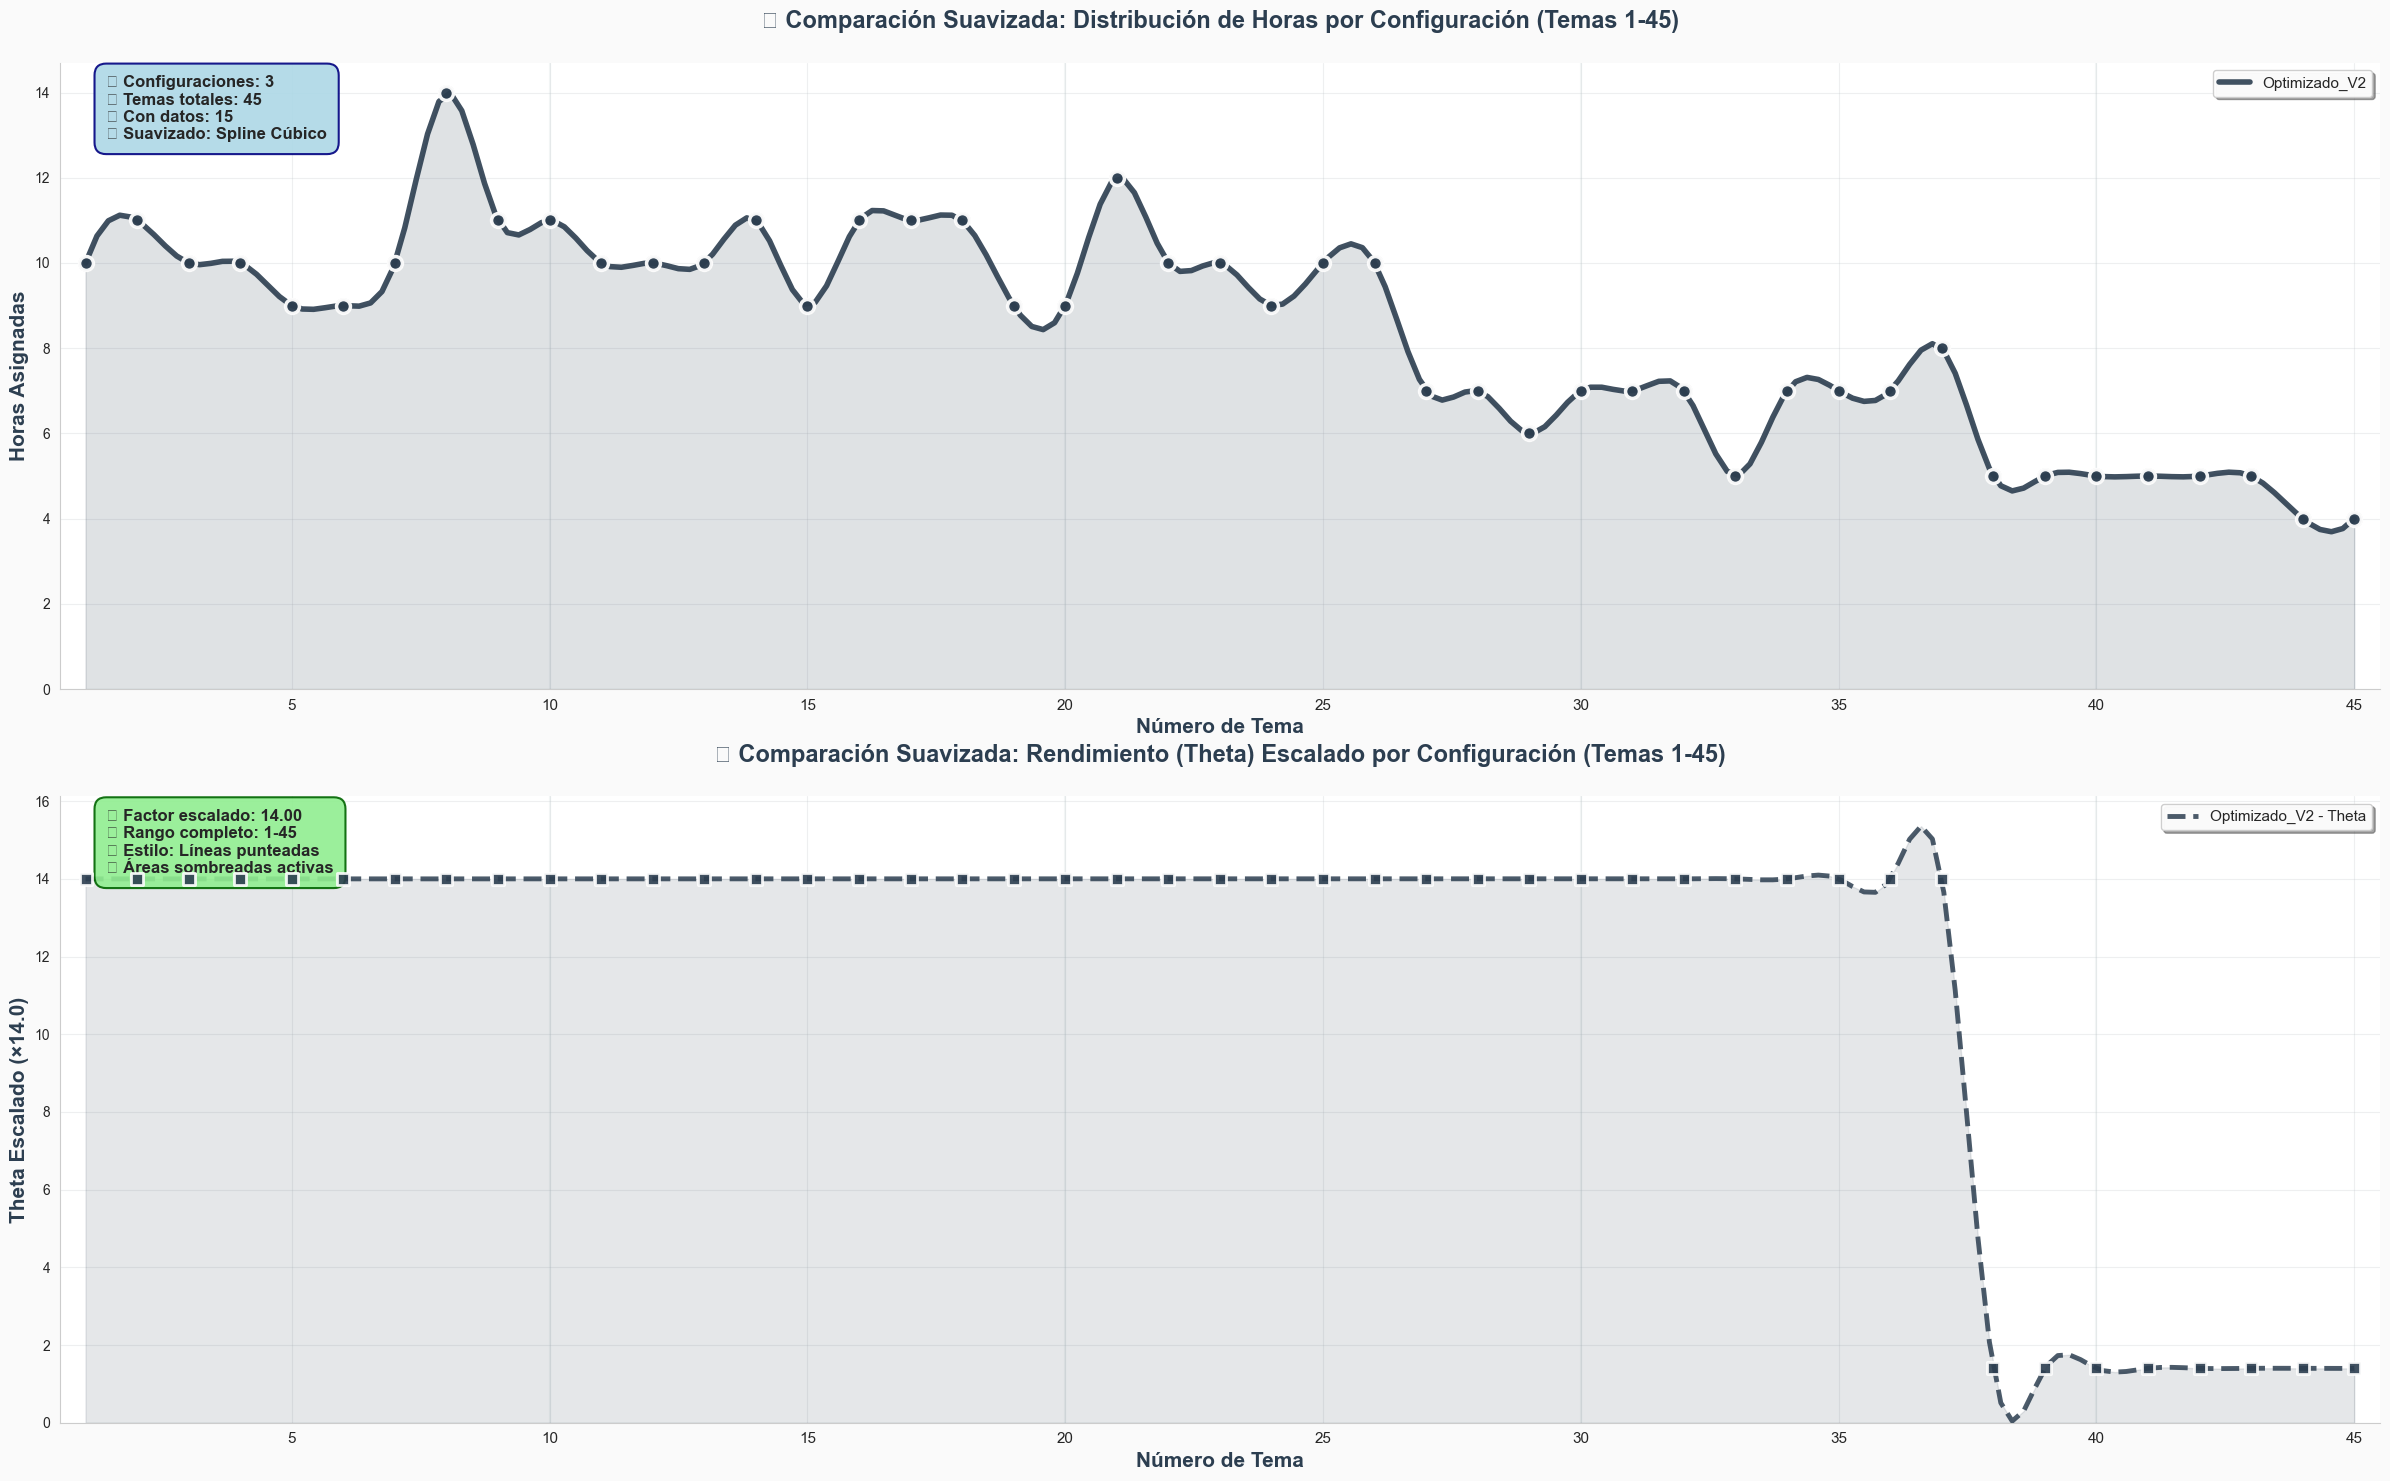

In [ ]:
from algorithm_testing.optimizer import limpiar_configuraciones, plot_comparacion_configuraciones, asignar_horas_estudio_optimizado
import numpy as np

# --- COMPARACIÓN POR ÁREAS TEMÁTICAS ---

# Limpiar configuraciones anteriores
limpiar_configuraciones()

print("\n=== COMPARACIÓN DE PERFILES POR ÁREA TEMÁTICA ===\n")
print("🎯 Mismo perfil base, diferentes rendimientos según área de conocimiento")

# --- CONFIGURACIÓN BASE FIJA ---
CONFIG_BASE = {
    'H_total': 380,
    'meses_estudio': [9, 10, 11, 12, 1, 2],
    'vuelta_estudio': 2,
    'N': 45,
    'h_max_factor': 0.035,
    'alpha_factor': 0.01,
    'prop_b1': 0.7,
    'prop_b2': 0.2,
    'prop_b3': 0.1,
    'mu': 0.1,
    'lambda_penalty1': 0.004,
    'lambda_penalty2': 0.003,
    'lambda_penalty3': 0.003,
    'topic_blocks': topic_blocks_real,
    'omega': omega_real
}

# --- CLASIFICACIÓN CORRECTA DE TEMAS POR ÁREA ---
AREAS_TEMATICAS = {
    'derecho': list(range(1, 28)),           # Temas 1-27: Derecho
    'sociologia': list(range(27, 39)),       # Temas 27-38: Sociología
    'cientifico_tecnico': list(range(38, 46)) # Temas 38-45: Científico-Técnico
}

print("📋 CLASIFICACIÓN DE TEMAS:")
print(f"   ⚖️ Derecho (1-27): {len(AREAS_TEMATICAS['derecho'])} temas")
print(f"   🏛️ Sociología (27-38): {len(AREAS_TEMATICAS['sociologia'])} temas")
print(f"   🔬 Científico-Técnico (38-45): {len(AREAS_TEMATICAS['cientifico_tecnico'])} temas")
print(f"   📝 Total: {sum(len(v) for v in AREAS_TEMATICAS.values())} temas")
print()

# --- PERFIL 1: ESPECIALISTA EN DERECHO ---
print("⚖️ PERFIL 1: ESPECIALISTA EN DERECHO")
print("   Excelente en Derecho, malo en Sociología y Científico-Técnico")

theta_derecho_especialista = {}
for i in range(1, 46):
    if i in AREAS_TEMATICAS['derecho']:  # Derecho (1-27) - Excelente
        theta_derecho_especialista[i] = np.random.uniform(0.8, 1.0)
    elif i in AREAS_TEMATICAS['sociologia']:  # Sociología (27-38) - Malo
        theta_derecho_especialista[i] = np.random.uniform(0.04, 0.08)
    elif i in AREAS_TEMATICAS['cientifico_tecnico']:  # Científico-Técnico (38-45) - Malo
        theta_derecho_especialista[i] = np.random.uniform(0.8, 1.0)

resultado_derecho_especialista = asignar_horas_estudio_optimizado(
    **CONFIG_BASE,
    theta=theta_derecho_especialista
)

# Calcular promedios por área
promedio_derecho = np.mean([theta_derecho_especialista[i] for i in AREAS_TEMATICAS['derecho']])
promedio_sociologia = np.mean([theta_derecho_especialista[i] for i in AREAS_TEMATICAS['sociologia']])
promedio_cientifico = np.mean([theta_derecho_especialista[i] for i in AREAS_TEMATICAS['cientifico_tecnico']])

print(f"✅ Total horas: {sum(resultado_derecho_especialista.values())}h")
print(f"   Temas cubiertos: {sum(1 for h in resultado_derecho_especialista.values() if h > 0)}/45")
print(f"   📊 Rendimiento por área:")
print(f"      • Derecho (1-27): θ={promedio_derecho:.3f} (ALTO)")
print(f"      • Sociología (27-38): θ={promedio_sociologia:.3f} (BAJO)")
print(f"      • Científico-Técnico (38-45): θ={promedio_cientifico:.3f} (BAJO)")
print()

# --- PERFIL 2: RENDIMIENTO EQUILIBRADO ---
print("⚖️ PERFIL 2: ESTUDIANTE EQUILIBRADO")
print("   Rendimiento similar en todas las áreas")

theta_equilibrado = {}
# Rendimiento similar en todas las áreas (nivel intermedio)
for i in range(1, 46):
    # Pequeña variación aleatoria pero manteniendo equilibrio
    base_theta = 0.12
    theta_equilibrado[i] = np.random.uniform(base_theta - 0.02, base_theta + 0.02)

resultado_equilibrado = asignar_horas_estudio_optimizado(
    **CONFIG_BASE,
    theta=theta_equilibrado
)

# Calcular promedios por área para perfil equilibrado
promedio_derecho_eq = np.mean([theta_equilibrado[i] for i in AREAS_TEMATICAS['derecho']])
promedio_sociologia_eq = np.mean([theta_equilibrado[i] for i in AREAS_TEMATICAS['sociologia']])
promedio_cientifico_eq = np.mean([theta_equilibrado[i] for i in AREAS_TEMATICAS['cientifico_tecnico']])

print(f"✅ Total horas: {sum(resultado_equilibrado.values())}h")
print(f"   Temas cubiertos: {sum(1 for h in resultado_equilibrado.values() if h > 0)}/45")
print(f"   📊 Rendimiento por área:")
print(f"      • Derecho (1-27): θ={promedio_derecho_eq:.3f} (MEDIO)")
print(f"      • Sociología (27-38): θ={promedio_sociologia_eq:.3f} (MEDIO)")
print(f"      • Científico-Técnico (38-45): θ={promedio_cientifico_eq:.3f} (MEDIO)")
print()

# --- PERFIL 3: ESPECIALISTA EN CIENTÍFICO-TÉCNICO ---
print("🔬 PERFIL 3: ESPECIALISTA CIENTÍFICO-TÉCNICO")
print("   Excelente en Científico-Técnico, malo en Derecho y Sociología")

theta_cientifico_especialista = {}
for i in range(1, 46):
    if i in AREAS_TEMATICAS['cientifico_tecnico']:  # Científico-Técnico (38-45) - Excelente
        theta_cientifico_especialista[i] = np.random.uniform(0.1, 0.1)
    elif i in AREAS_TEMATICAS['derecho']:  # Derecho (1-27) - Malo
        theta_cientifico_especialista[i] = np.random.uniform(1.0, 1.0)
    elif i in AREAS_TEMATICAS['sociologia']:  # Sociología (27-38) - Malo
        theta_cientifico_especialista[i] = np.random.uniform(1.0, 1.00)

resultado_cientifico_especialista = asignar_horas_estudio_optimizado(
    **CONFIG_BASE,
    theta=theta_cientifico_especialista
)

# Calcular promedios por área para perfil científico
promedio_derecho_cient = np.mean([theta_cientifico_especialista[i] for i in AREAS_TEMATICAS['derecho']])
promedio_sociologia_cient = np.mean([theta_cientifico_especialista[i] for i in AREAS_TEMATICAS['sociologia']])
promedio_cientifico_cient = np.mean([theta_cientifico_especialista[i] for i in AREAS_TEMATICAS['cientifico_tecnico']])

print(f"✅ Total horas: {sum(resultado_cientifico_especialista.values())}h")
print(f"   Temas cubiertos: {sum(1 for h in resultado_cientifico_especialista.values() if h > 0)}/45")
print(f"   📊 Rendimiento por área:")
print(f"      • Derecho (1-27): θ={promedio_derecho_cient:.3f} (BAJO)")
print(f"      • Sociología (27-38): θ={promedio_sociologia_cient:.3f} (BAJO)")
print(f"      • Científico-Técnico (38-45): θ={promedio_cientifico_cient:.3f} (ALTO)")
print()

# --- MOSTRAR GRÁFICO COMPARATIVO ---
print("📊 Generando gráfico comparativo...")
plot_comparacion_configuraciones()

In [ ]:
print(omega_real)

{1: 0.0275, 2: 0.0375, 3: 0.025, 4: 0.0275, 5: 0.02, 6: 0.0175, 7: 0.0275, 8: 0.07, 9: 0.035, 10: 0.035, 11: 0.0225, 12: 0.0225, 13: 0.0275, 14: 0.035, 15: 0.0175, 16: 0.035, 17: 0.0375, 18: 0.035, 19: 0.02, 20: 0.02, 21: 0.0425, 22: 0.0225, 23: 0.0225, 24: 0.0125, 25: 0.0225, 26: 0.0225, 27: 0.015, 28: 0.0175, 29: 0.0075, 30: 0.0125, 31: 0.0075, 32: 0.0075, 33: 0.005, 34: 0.0175, 35: 0.01, 36: 0.0125, 37: 0.02, 38: 0.0125, 39: 0.015, 40: 0.0175, 41: 0.025, 42: 0.025, 43: 0.0175, 44: 0.01, 45: 0.005}


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, FileLink
import numpy as np
from algorithm_testing.optimizer import limpiar_configuraciones, asignar_horas_estudio_optimizado

# Configuración base
limpiar_configuraciones()
CONFIG_BASE = {
    'H_total': 380,
    'meses_estudio': [9, 10, 11, 12, 1, 2],
    'vuelta_estudio': 2,
    'N': 45,
    'h_max_factor': 0.035,
    'alpha_factor': 0.01,
    'prop_b1': 0.7,
    'prop_b2': 0.2,
    'prop_b3': 0.1,
    'mu': 1,
    'lambda_penalty1': 0.004,
    'lambda_penalty2': 0.003,
    'lambda_penalty3': 0.003,
    'topic_blocks': topic_blocks_real,
    'omega': omega_real
}

AREAS_TEMATICAS = {
    'derecho': list(range(1, 28)),
    'sociologia': list(range(27, 39)),
    'cientifico_tecnico': list(range(38, 46))
}

# Sliders
slider1 = widgets.FloatSlider(value=0.1, min=0.1, max=1, step=0.01, description="Derecho")
slider2 = widgets.FloatSlider(value=0.1, min=0.1, max=1, step=0.01, description="Sociología")
slider3 = widgets.FloatSlider(value=0.1, min=0.1, max=1, step=0.01, description="Científico")

out = widgets.Output()

# Botón de descarga
boton = widgets.Button(description="Descargar gráfica", button_style="success")

def actualizar(change=None):
    with out:
        clear_output(wait=True)

        # Recalcular theta
        theta = {}
        for i in range(1, 46):
            if i in AREAS_TEMATICAS['derecho']:
                if i>16:
                    theta[i] = np.random.uniform(0.1, 0.1) * slider1.value
                else:
                    theta[i] = np.random.uniform(0.1, 0.1) * slider2.value
            elif i in AREAS_TEMATICAS['sociologia']:
                if i>33:
                    theta[i] = np.random.uniform(0.1, 0.1) * slider3.value
                else:
                    theta[i] = np.random.uniform(0.1, 0.1)
            elif i in AREAS_TEMATICAS['cientifico_tecnico']:
                theta[i] = np.random.uniform(0.1, 0.1)

        asignar_horas_estudio_optimizado(**CONFIG_BASE, theta=theta)

        # Dibujar gráfico
        valores = [theta[i]*56 for i in range(1, 46)]
        plt.figure(figsize=(15,5))
        plt.bar(range(1,46), valores, color="skyblue")
        plt.ylim(0,1)
        plt.xlabel("Tema")
        plt.ylabel("Potenciómetro (0–1)")
        plt.savefig("grafica.png", dpi=150, bbox_inches="tight")  # <-- guardamos siempre
        plt.show()

def descargar(_):
    display(FileLink("grafica.png"))

# Conectar eventos
for s in (slider1, slider2, slider3):
    s.observe(actualizar, names="value")

boton.on_click(descargar)

# Mostrar todo
display(widgets.VBox([slider1, slider2, slider3, boton]), out)
actualizar()


Output()

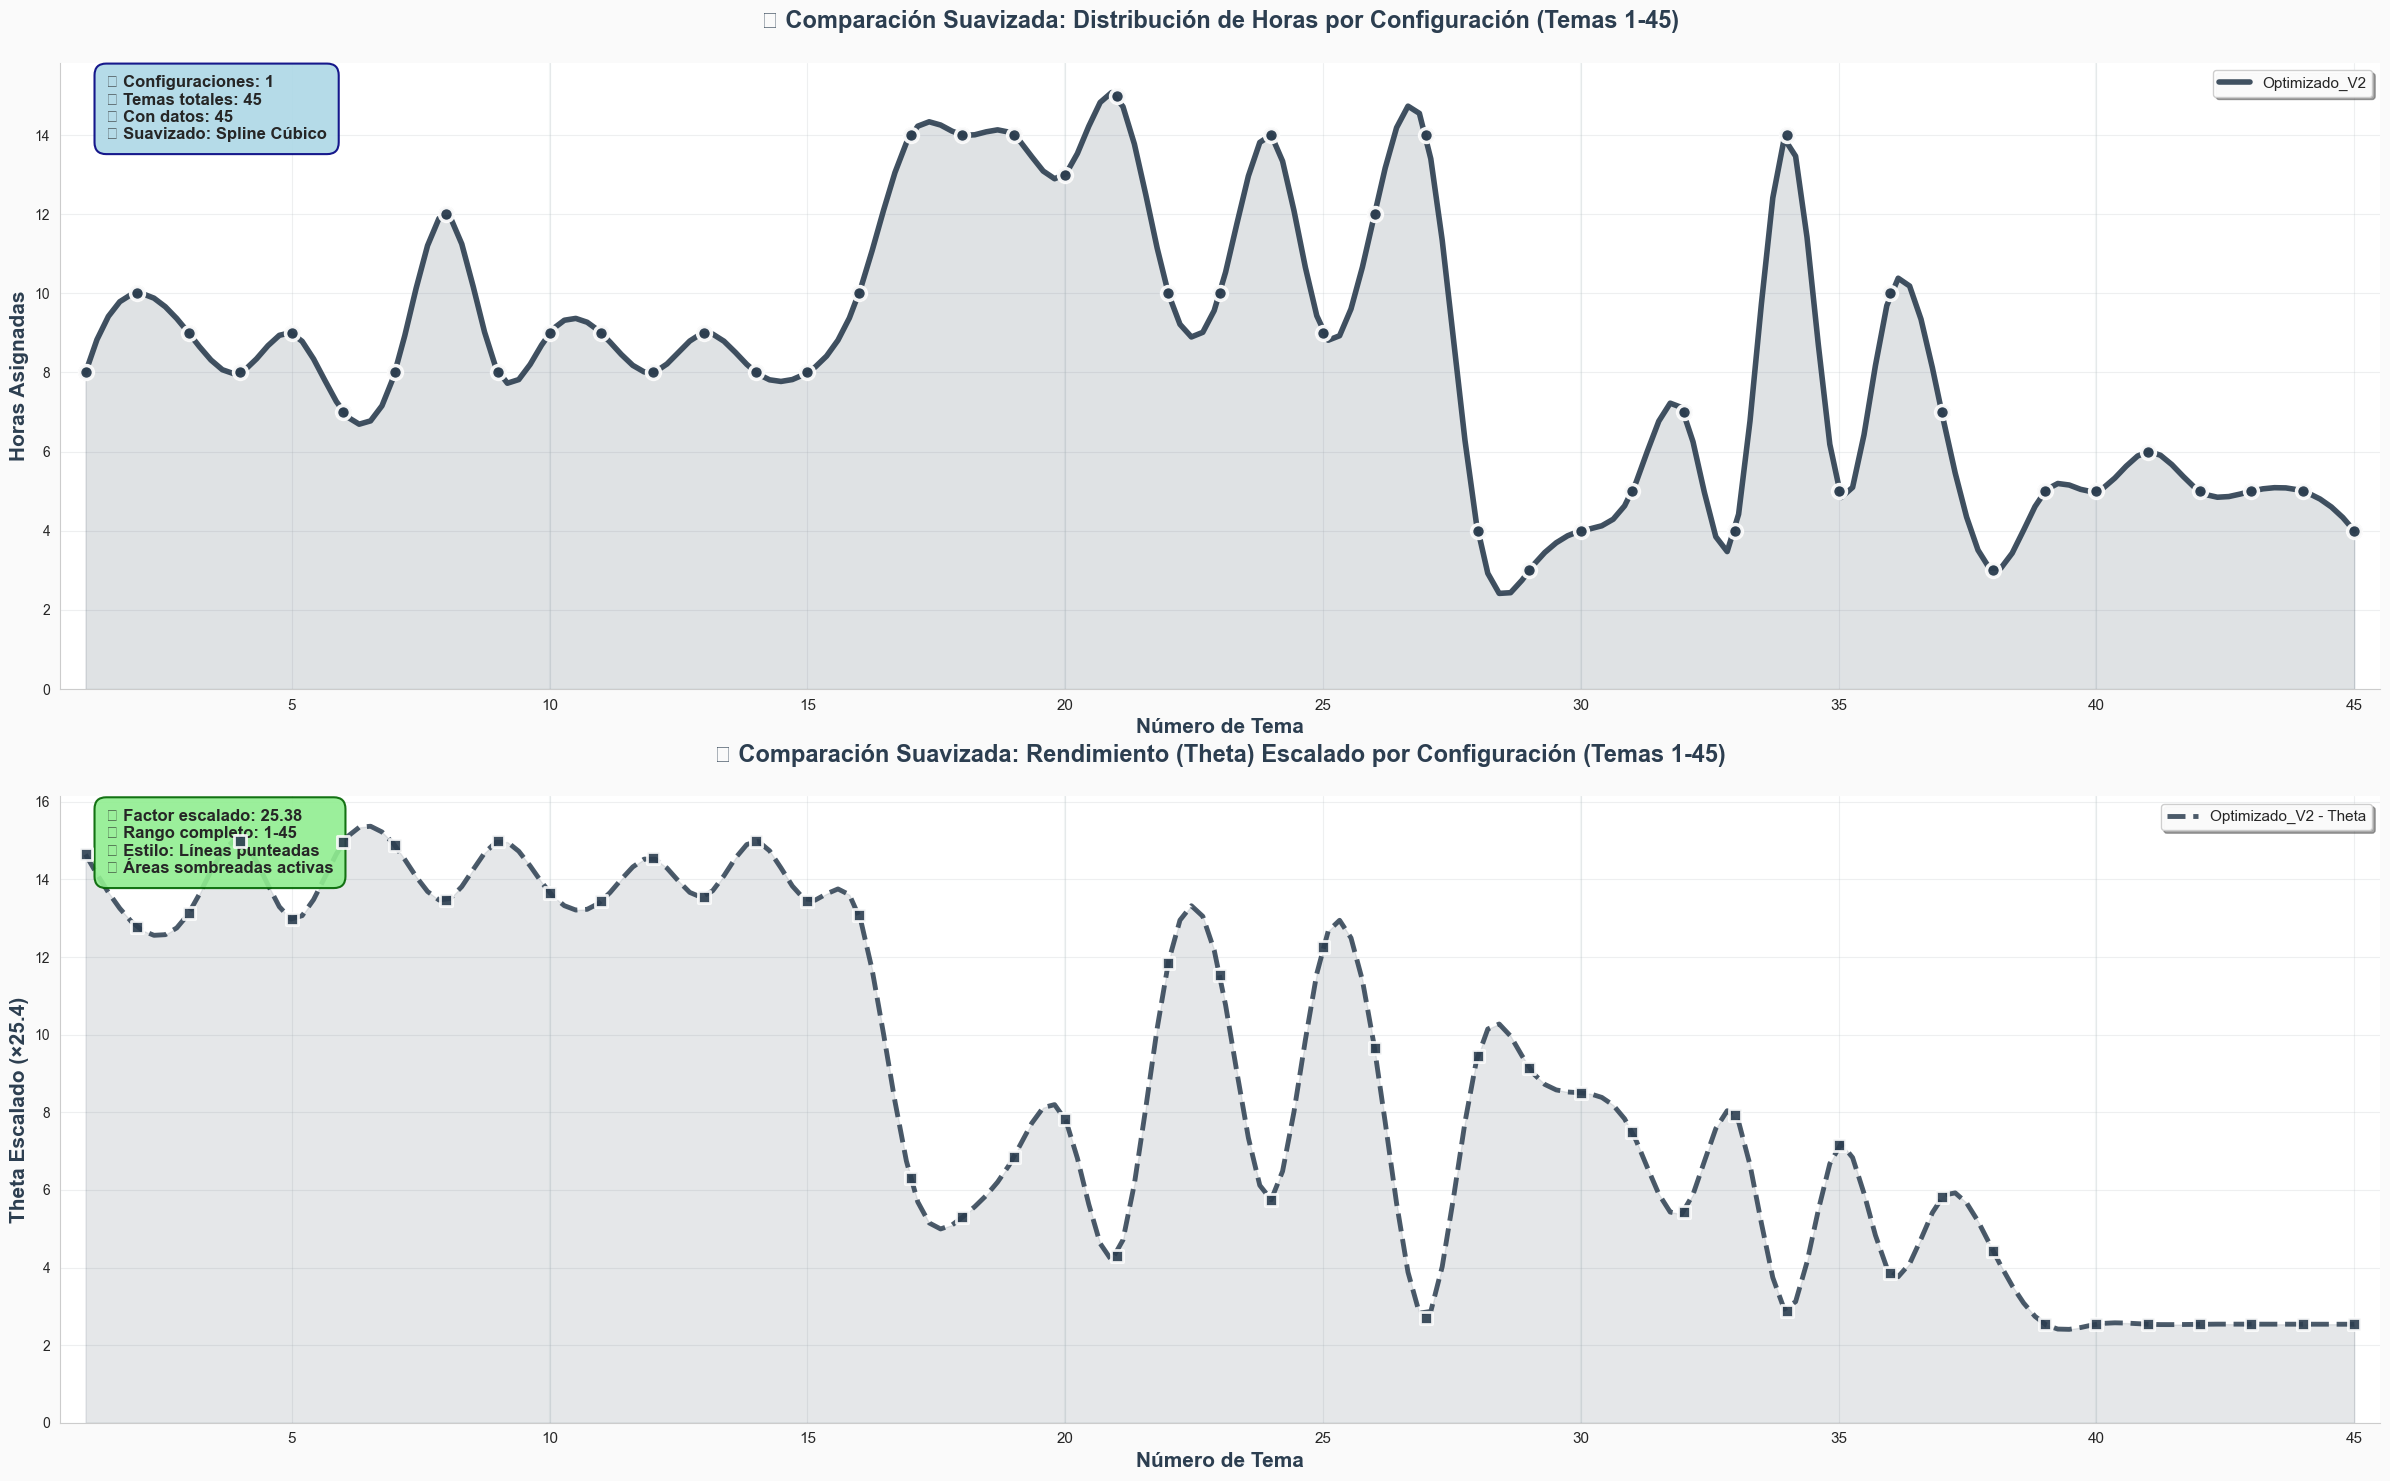

{'1': 8,
 '2': 10,
 '3': 9,
 '4': 8,
 '5': 9,
 '6': 7,
 '7': 8,
 '8': 12,
 '9': 8,
 '10': 9,
 '11': 9,
 '12': 8,
 '13': 9,
 '14': 8,
 '15': 8,
 '16': 10,
 '17': 14,
 '18': 14,
 '19': 14,
 '20': 13,
 '21': 15,
 '22': 10,
 '23': 10,
 '24': 14,
 '25': 9,
 '26': 12,
 '27': 14,
 '28': 4,
 '29': 3,
 '30': 4,
 '31': 5,
 '32': 7,
 '33': 4,
 '34': 14,
 '35': 5,
 '36': 10,
 '37': 7,
 '38': 3,
 '39': 5,
 '40': 5,
 '41': 6,
 '42': 5,
 '43': 5,
 '44': 5,
 '45': 4}

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, FileLink
import numpy as np
from algorithm_testing.optimizer import limpiar_configuraciones, asignar_horas_estudio_optimizado

# Configuración base
limpiar_configuraciones()
CONFIG_BASE = {
    'H_total': 380,
    'meses_estudio': [9, 10, 11, 12, 1, 2],
    'vuelta_estudio': 2,
    'N': 45,
    'h_max_factor': 0.035,
    'alpha_factor': 0.01,
    'prop_b1': 0.7,
    'prop_b2': 0.2,
    'prop_b3': 0.1,
    'mu': 1,
    'lambda_penalty1': 0.004,
    'lambda_penalty2': 0.003,
    'lambda_penalty3': 0.003,
    'topic_blocks': topic_blocks_real,
    'omega': omega_real
}

AREAS_TEMATICAS = {
    'derecho': list(range(1, 28)),
    'sociologia': list(range(27, 39)),
    'cientifico_tecnico': list(range(38, 46))
}

# Sliders
slider1 = 0.5
slider2 = 0.5
slider3 = 0.2

out = widgets.Output()

theta = {}

for i in range(1, 46):
    if i in AREAS_TEMATICAS['derecho']:
        if i>16:
            theta[i] = np.random.uniform(0.1, 0.5)
        else:
            theta[i] = np.random.uniform(0.5, 0.6)
    elif i in AREAS_TEMATICAS['sociologia']:
        if i>33:
            theta[i] = np.random.uniform(0.1, 0.3)
        else:
            theta[i] = np.random.uniform(0.1, 0.4)
    elif i in AREAS_TEMATICAS['cientifico_tecnico']:
        theta[i] = np.random.uniform(0.1, 0.1)
    else:
        theta[i] = np.random.uniform(0.1, 0.1)

asignar_horas_estudio_optimizado(**CONFIG_BASE, theta=theta)
